In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Pandas version 1.0.5
Numpy version 1.18.5


In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.precision', 2)
pd.set_option('max_rows', 250)
pd.set_option('max_columns', 250)

plt.style.use('seaborn')

In [3]:
#import numba
#@numba.jit
def Auto_Loan(Loans, Rates, Periods):
    Rates = Rates / 100 / 12
    return (Rates * Loans / (1-m.pow(1 + Rates, -Periods)))

In [4]:
%time
Auto_Loan(25515, 3.19, 72)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 16.7 µs


389.83925640372223

In [5]:
%time
np.pmt(rate=(3.19/100/12), nper=72, pv=-25515)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


<ipython-input-5-017008f22190>:2: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  np.pmt(rate=(3.19/100/12), nper=72, pv=-25515)


389.83925640372235

In [6]:
print(Auto_Loan(25515, 3.19, 72))

print(np.pmt(rate=(3.19/100/12), nper=72, pv=-25515))

389.83925640372223
389.83925640372235


<ipython-input-6-0fe304d64de9>:3: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  print(np.pmt(rate=(3.19/100/12), nper=72, pv=-25515))


In [7]:
states = np.array(['NJ','NY','PA'])
states

array(['NJ', 'NY', 'PA'], dtype='<U2')

In [8]:
ratios = np.array([.1, .85, .05])
ratios

array([0.1 , 0.85, 0.05])

In [9]:
Cars = np.r_[22000:30001,41000,45000,51000:60001,105000]
type(Cars)

numpy.ndarray

In [10]:
Cars.size

17005

In [11]:
30000 in Cars

True

In [12]:
30001 in Cars

False

In [13]:
Cars2 = np.random.randint(22000, 40000, 15)
Cars2

array([26534, 29703, 23749, 30781, 36805, 37802, 32911, 32632, 23214,
       36854, 28198, 24978, 24102, 22375, 29516])

In [14]:
Cars[np.isin(Cars, Cars2)]

array([22375, 23214, 23749, 24102, 24978, 26534, 28198, 29516, 29703])

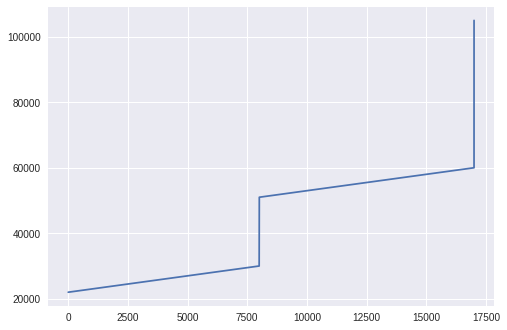

In [15]:
sns.lineplot(x=np.arange(0,Cars.size), y=Cars);

In [16]:
np.median(Cars)

51499.0

In [17]:
np.std(Cars)

14936.27187006859

In [18]:
np.busday_count('2019-01-01', '2020-01-01')

261

In [19]:
365 - (52*2)

261

In [20]:
nyd = [str(y) + '-01-01' for y in range(1970, 2031)]
july4 = [str(y) + '-07-04' for y in range(1970, 2031)]
xmas = [str(y) + '-12-25' for y in range(1970, 2031)]

print(nyd[-7:])
print(july4[-7:])
print(xmas[-7:])

['2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01']
['2024-07-04', '2025-07-04', '2026-07-04', '2027-07-04', '2028-07-04', '2029-07-04', '2030-07-04']
['2024-12-25', '2025-12-25', '2026-12-25', '2027-12-25', '2028-12-25', '2029-12-25', '2030-12-25']


In [21]:
np.busday_count('2019-01-01', '2020-01-01', holidays=nyd + july4 + xmas)

258

In [22]:
N = 3000

Start_Dates = np.random.choice(np.arange('2019-11-26', '2020-07-01', dtype='datetime64[D]'), replace=True, size=N)
States = np.random.choice(states, size=(N), p=ratios)
Loans = np.random.normal(loc=np.median(Cars), scale=1000, size=N).astype(int)
Rates = np.random.choice(np.linspace(start=4.6, stop=5.2, num=6, dtype=np.float32), replace=True, size=N)
Periods = np.random.choice(np.arange(12, 84, 12), replace=True, size=N)
End_Dates = Start_Dates + (Periods * 30)
Bus_Days = np.busday_count(Start_Dates, End_Dates)
Luxury = np.where(Loans >= 50000, True, False)

In [23]:
#start = time.perf_counter_ns()

Payments = np.pmt(rate=Rates/100/12, nper=Periods, pv=-Loans)

#print("Processed in {:,} nanseconds".format(time.perf_counter_ns()-start))

<ipython-input-23-c6134f571b32>:3: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  Payments = np.pmt(rate=Rates/100/12, nper=Periods, pv=-Loans)


In [24]:
auto_np = np.empty(N, dtype={'names':('states','loans','rates','periods','payments','start_dates','end_dates', 'bus_days', 'luxury'),
                             'formats':('U2','f8','f8','i8','f8','datetime64[D]','datetime64[D]', 'i8', 'bool')})

In [25]:
auto_np['states'] = States
auto_np['loans'] = Loans
auto_np['rates'] = Rates
auto_np['periods'] = Periods
auto_np['payments'] = Payments
auto_np['start_dates'] = Start_Dates
auto_np['end_dates'] = End_Dates
auto_np['bus_days'] = Bus_Days
auto_np['luxury'] = Luxury

auto_np.size

3000

In [26]:
print('${:,.0f}'.format(auto_np['payments'].sum()))

$5,623,149


In [27]:
print('${:,.2f}'.format(auto_np['payments'].mean()))

$1,874.38


In [28]:
print('${:,.2f}'.format(auto_np['payments'].max()))

$4,682.13


In [32]:
auto_np[0]

('NY', 49927., 4.84000015, 60, 938.52990199, '2020-03-03', '2025-02-05', 1286, False)

In [33]:
np.set_printoptions(precision=2)

In [34]:
print(auto_np[0:5])

[('NY', 49927., 4.84, 60,  938.53, '2020-03-03', '2025-02-05', 1286, False)
 ('PA', 50669., 4.96, 24, 2222.01, '2020-03-12', '2022-03-02',  514,  True)
 ('NY', 53276., 4.84, 72,  854.06, '2020-01-13', '2025-12-12', 1544,  True)
 ('NY', 51111., 4.84, 72,  819.35, '2020-06-01', '2026-05-01', 1544,  True)
 ('NJ', 50375., 5.08, 48, 1161.92, '2020-05-15', '2024-04-24', 1028,  True)]


In [35]:
print(auto_np[-5:])

[('NY', 51822., 5.08, 24, 2275.35, '2020-04-28', '2022-04-18',  514,  True)
 ('PA', 51573., 4.96, 60,  972.3 , '2019-12-18', '2024-11-21', 1286,  True)
 ('NY', 52607., 4.6 , 24, 2298.55, '2020-02-27', '2022-02-16',  514,  True)
 ('NY', 49503., 5.2 , 60,  938.72, '2020-02-15', '2025-01-19', 1285, False)
 ('NY', 52130., 4.96, 60,  982.8 , '2020-02-20', '2025-01-24', 1286,  True)]


In [36]:
print(auto_np[auto_np['periods']==12][0:5])

[('NY', 52420., 5.2 , 12, 4492.31, '2020-05-14', '2021-05-09', 257,  True)
 ('NY', 51165., 4.96, 12, 4379.16, '2020-05-12', '2021-05-07', 258,  True)
 ('PA', 51271., 5.08, 12, 4391.03, '2020-06-23', '2021-06-18', 258,  True)
 ('NY', 51944., 4.84, 12, 4442.99, '2019-12-08', '2020-12-02', 257,  True)
 ('NY', 51447., 4.96, 12, 4403.29, '2020-01-17', '2021-01-11', 256,  True)]


In [37]:
auto_np[auto_np['payments'] > 600]['loans']

array([49927., 50669., 53276., ..., 52607., 49503., 52130.])

In [38]:
auto_np[auto_np['payments'] == auto_np['payments'].min()]['loans']

array([48673.])

In [39]:
auto_np[auto_np['loans'] < 0]['loans']

array([], dtype=float64)

In [40]:
np.unique(auto_np['states'])

array(['NJ', 'NY', 'PA'], dtype='<U2')

/home/gda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


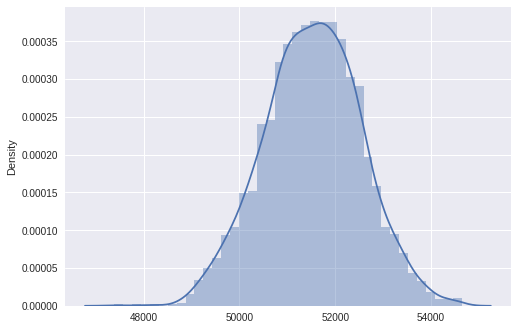

In [41]:
sns.distplot(auto_np['loans']);

/home/gda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


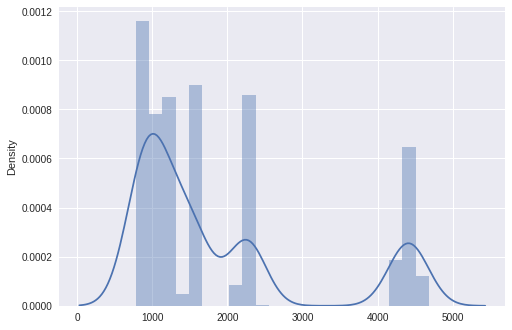

In [42]:
sns.distplot(auto_np['payments']);

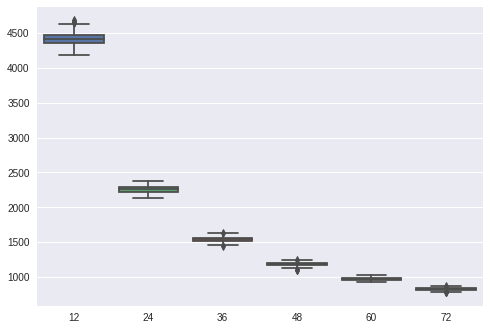

In [43]:
sns.boxplot(x=auto_np['periods'], y=auto_np['payments']);

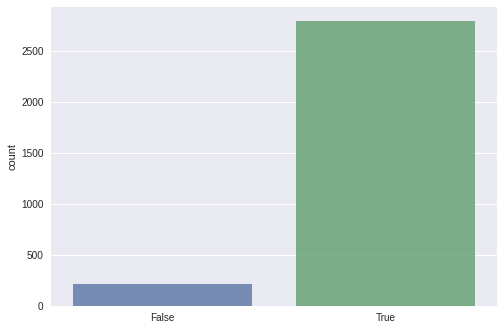

In [44]:
sns.countplot(x=auto_np['luxury'], alpha=.8);

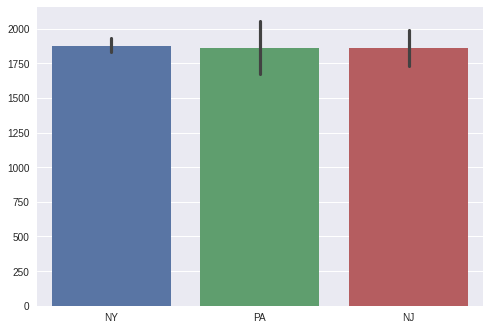

In [45]:
sns.barplot(x=auto_np['states'], y=auto_np['payments']);

In [46]:
auto_np['payments'][0:10]

array([ 938.53, 2222.01,  854.06,  819.35, 1161.92, 4492.31, 1582.81,
        950.13, 2267.65, 4379.16])

In [47]:
#auto_np['payments'].tofile(file='auto_payments.csv', format='%.0f', sep=';')

In [48]:
#auto_payments = np.fromfile(file='auto_payments.csv', sep=';')
#auto_payments[0:10]

In [49]:
price_test = auto_np['loans'] > 50000
payment_test = auto_np['payments'] < 1000

auto_bool = np.logical_and(price_test, payment_test)

auto_np[auto_bool].size

924

In [50]:
df = pd.DataFrame.from_records(auto_np[auto_bool])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   states       924 non-null    object        
 1   loans        924 non-null    float64       
 2   rates        924 non-null    float64       
 3   periods      924 non-null    int64         
 4   payments     924 non-null    float64       
 5   start_dates  924 non-null    datetime64[ns]
 6   end_dates    924 non-null    datetime64[ns]
 7   bus_days     924 non-null    int64         
 8   luxury       924 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 58.8+ KB


In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.nsmallest(n=20, columns='payments')

In [ ]:
cars = sns.load_dataset('mpg')
cars.head()

In [ ]:
cars.isna().sum()

In [ ]:
cars.corr()

In [ ]:
cars.dropna(subset=['horsepower'], inplace=True)

In [ ]:
X = cars.horsepower.values
Y = cars.mpg.values

sns.regplot(X, Y );

In [ ]:
# numpy polyfit

# Creates a linear regression from the data points
m, b = np.polyfit(x=X, y=Y, deg=1)

print("m={:.02f},  b={:.02f}".format(m, b))

In [ ]:
# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
sns.scatterplot(x=X, y=Y, alpha=.4)
sns.lineplot(X, f(X), color='grey');

In [ ]:
fit = np.polyfit(x=X, y=Y, deg=1)

fit

In [ ]:
np.polyval(fit,75)

In [ ]:
xval = 100

sns.scatterplot(x=X, y=Y, alpha=.4)
sns.scatterplot(x=[xval], y=[np.polyval(fit,xval)], color='r')
sns.lineplot(X, f(X), color='grey');

In [ ]:
from ipywidgets import interact

@interact(xval=150)
def plot(xval):
    sns.scatterplot(x=X, y=Y, alpha=.4)
    sns.scatterplot(x=[xval], y=[np.polyval(fit,xval)], color='r')
    sns.lineplot(X, f(X), color='grey');
